<a href="https://colab.research.google.com/github/EdeEsteban/Analitica-de-Datos/blob/main/Super_Bowl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto desarrollado por: 

*   Cristian Camilo Casas - 201911670
*   Angel Gustavo Granados - 20191167090
*   Deiby Esteban Salas - 20192167036
*   Esteban Delgadillo Alvarez - 20191167079



# **1. Introducción**

**Super Bowl**

El super bowl es un espectáculo enfocado en el futbol americano  (Es el nombre que se le da al partido final del campeonato de la National Football League  por sus siglas en ingles (NFL)), en el que se enfrentan los campeones de la Conferencia Nacional (NFC) y de la Conferencia Americana (AFC). Se disputa el segundo domingo del mes de febrero y debe su nombre a Lamar Hunt, antiguo propietario de Kansas City Chiefs, quien lo llamó así para diferenciarlo del resto de bowls que se disputaban. [https://es.wikipedia.org/wiki/Super_Bowl]. Este espectáculo  incluye musicos famosos, automatas mecanicos gigantes y todo tipo de entretenimiento. Hay dramas, controversias, anuncios, fiestas, todo para los aficionados al deporte.  

---
**Objetivo:** Verificar que datos influyen en el Rating y Share del Super Bowl

---

**Librerias:**

Para empezar con el desarrollo del proyecto se importarán las siguientes librerías:

*   **Numpy:** Librería usada para manipular arreglos. Se importa usualmente con el alias `np` de la siguiente manera: `import numpy as np`
*   **Pandas:** Librería empleada para manejar DataFrame y manipulación de datos. Se importa usualmente con el alias `pd` de la siguiente manera: `import` pandas as pd
*   **Seaborn:** Librería para realizar gráficos estadísticos y visualización de datos. Se importa usualmente con el alias `sns` de la siguiente manera: `import seaborn as sns`
*   **Matplotlib:** Librería para realizar gráficos, en particular se usará usaremos `pyplot` que facilita la creación de estos. Se importa usualmente con el alias `plt` de la siguiente manera: `import matplotlib.pyplot as plt`

*   **Geopandas**: Es un proyecto de código abierto para facilitar el trabajo con datos geoespaciales en python. GeoPandas amplía los tipos de datos utilizados por pandas para permitir operaciones espaciales en tipos geométricos.

---
**Datos:** Para el desarrollo de este proyecto contamos con dos bases de datos que tienen las siguientes variables:

**Tabla 1:**

*   **Date/Season:** Fecha en la que se jugó la edición del Super Bowl.
*   **Super Bowl:** Número que representa la edución del Super Bowl.
*   **Winning team:** Equipo que ganó dicha edición del Super Bowl.
*   **Winner Score:** Puntos que anotó el equipo ganador.
*   **Losing team:** Equipo que perdió la edición del Super Bowl.
*   **Venue:** Estadio donde se jugó la edición del Super Bowl.
*   **Attendance:** Cantidad de personas que fueron al estadio en calidad de espectadores.
*   **Cities:** Ciudad donde se jugó.
*   **States:** Estado donde se jugó.
*   **Referee:** Arbitro que dirigió el partido.
*   **Diferencia:** Diferencia de puntos entre el equipo ganador y el equipo perdedor.



---


**Tabla 2:**


---



Terminología a tener en cuenta:

**Rating:** Cifra que indica el porcentaje de hogares o espectadores con la televisión encendida en un canal, programa, día y hora específicos (o promediando minutos y fechas), en relación al total de televidentes considerados en la muestra (encendidos y apagados).

**Share:** Medida de audiencia que estima el porcentaje de hogares o espectadores que están viendo un programa de televisión y con respecto al total que tiene encendido su televisor durante la emisión.

**Households:** Todas las personas en una familia o grupo que viven juntos en una casa.

**18-49:** Personas entre 18 y 49 años


---


*   **Super Bowl:** Edición del Super Bowl.
*   **Date:** Fecha en la que se jugó.
*   **Network:** Agencia televisiva que pasó el evento.
*   **Avg. viewers(millions):** Visualizaciones promedio durante el Super Bowl (medidas en millones).
*   **Total viewers(millions):** Visualizaciones totales durante el Super Bowl (medidas en millones)
*   **Rating HH:** Medición del rating para households.
*   **Share HH:**  Medición del share para households.
*   **Rating 18-49:** Medición del rating para las personas entre 18-49 años.
*   **Share 18-49:** Medición del share para las personas entre 18-49 años.
*   **Cost 30s ad:** Coste promedio de un anuncio de 30 segundos reproducido durante el Super Bowl.
*   **Adjusted to inflation 2021:** Coste del anuncio ajustado a la inflación del año 2021




In [ ]:
#try:
#  import geopandas as gpd
#except:
#  !pip install geopandas
#  import geopandas as gpd
#!pip install cufflinks
#import cufflinks as cf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
#import geopandas as gpd
#import geopandas

# **2. Limpieza de datos**

Obtenemos los datos a analizar directamente de Wikipedia, en ellos encontramos caracteres y números que tienen sentido al momento de verlo en internet, cómo las referencias, que nos indican de donde Wikipedia toma la información, pero para nuestra tarea solo estorban.

Necesitamos también crear nuevos data frames que relacionen ciertos atributos de alguna forma en particular para su posterior análisis. 

En esta sección crearemos los dataframes y eliminaremos los datos indeseados.



##**2.1 Tabla 1:**


### **2.1.1 Importamos los datos**

Cómo mencionamos, los datos vienen de Wikipedia, en su artículo "List of Super Bowl champions". Al abrir el artículo en internet, vemos que tiene varias tablas que podemos importar como dataframes, nos enfocaremos en la segunda. 

In [ ]:
super_bowl = pd.read_html("https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions")

#Importamos la segunda tabla de wikipedia como base de datos 
championships = super_bowl[1]  

championships.tail(3)

,Game,Date/Season,Winning team,Score,Losing team,Venue,City,Attendance,Referee,Ref
54,LV,"February 7, 2021 (2020)","Tampa Bay BuccaneersN(2, 2–0) [W]",31–9,"Kansas City ChiefsA(4, 2–2)",Raymond James Stadium (3),"Tampa, Florida (5)",24835,Carl Cheffers,[79][80]
55,LVI,"February 13, 2022 (2021)","Los Angeles RamsN(5, 2–3)",23–20,"Cincinnati BengalsA(3, 0–3)",SoFi Stadium,"Inglewood, California (8)[sb 2]",70048,Ron Torbert,[79][80]
56,Game,Date/Season,Winning team,Score,Losing team,Venue,City,Attendance,Referee,Ref


### **2.1.2 Eliminando texto inoportuno**

Con un simple vistazo es fácil notar las primeras cosas que debemos cambiar:

*   Varias entradas tienen texto entre corchetes y paréntesis.
*   Hay una columna entera con hipervínculos de Wikipedia de cada partido.
*   Hay una letra al final del nombre de cada equipo.
*   No nos interesa quien sea el referee.
*   La última fila es nuevamente el nombre de cada columna.

Vamos a encargarnos de esto.



 

In [ ]:
#Eliminamos columna Ref y Referee
championships = championships.drop(['Ref'], axis=1)  
championships = championships.drop(['Referee'], axis=1)  

#Eliminamos la fila 56
championships = championships.drop(56,axis=0)       

#En general no es bueno tener el caracter espacio " " al final, la siguiente
#función lo borra en caso de que exista
def quitarvaciof(texto):
  if texto[-1] == " ":
    texto = texto[:-1]
  return texto 

#Las funcion quitarvaciof se debe aplicar a cada casilla, sin embargo podemos
#quitar los corchetes y paréntesis de una columna por completo.
for col in  championships.columns:
  #Quitamos parentesis y llaves de cada columna
  championships[col] = championships[col].str.replace(r"\[.*\]","", regex = True)
  championships[col] = championships[col].str.replace(r"\(.*\)","", regex = True)

  for entry in range(championships.shape[0]):

    #Ejecutamos aplicarvaciof a cada entrada           
    championships[col][entry]  = quitarvaciof(championships[col][entry])

#Quitamos la letra al final de cada equipo
for i in range(len(championships["Winning team"])):
  championships["Winning team"][i]= championships["Winning team"][i][:-1] #+ championships["Winning team"][i][-2:]
  championships["Losing team"][i]= championships["Losing team"][i][:-1] #+ championships["Losing team"][i][-2:]
 


championships.head()




,Game,Date/Season,Winning team,Score,Losing team,Venue,City,Attendance
0,I,"January 15, 1967",Green Bay Packers,35–10,Kansas City Chiefs,Los Angeles Memorial Coliseum,"Los Angeles, California",61946
1,II,"January 14, 1968",Green Bay Packers,33–14,Oakland Raiders,Miami Orange Bowl,"Miami, Florida",75546
2,III,"January 12, 1969",New York Jets,16–7,Baltimore Colts,Miami Orange Bowl,"Miami, Florida",75389
3,IV,"January 11, 1970",Kansas City Chiefs,23–7,Minnesota Vikings,Tulane Stadium,"New Orleans, Louisiana",80562
4,V,"January 17, 1971",Baltimore Colts,16–13,Dallas Cowboys,Miami Orange Bowl,"Miami, Florida",79204


El DataFrame ya empieza a tener forma. Sim embargo la limpieza no ha terminado, pues debemos verificar que cada dato sea del tipo que necesitamos (quisieramos, por ejemplo, que los datos de la columna "Attendance' fuesen de tipo entero). 

Pero antes crearemos algunas columnas extra que nos servirán más adelante.

### **2.1.3 Construyendo nuevos DataFrames**

Para responder las preguntas planteadas al principio, necesitamos relacionar los datos de formas que originalmente no vienen. 
Empezaremos creando un nuevo DataFrame que nos muestre por separado el puntaje del equipo ganador  y del equipo perdedor, información que se encuentra en la columna`"Score" `; y separando la ciudad del estado en dos columnas diferentes.

In [ ]:
# Creamos un DataFrame con los datos separados en 'Winner Score' y "Loser Score"

Scorediv = championships['Score'].str.split(pat="–", expand=True)
Scorediv.columns=['Winner Score', "Loser Score"]

# Dado que hay un "-" en el texto, podemos inferir que es de tipo string, así 
#que lo cambiamos 

Scorediv = pd.DataFrame(data=[pd.to_numeric(Scorediv['Winner Score']), pd.to_numeric(Scorediv["Loser Score"])]).T

#Añadimos una columna con la diferencia de puntos entre el ganador y perdedor
Scorediv["Diference"] = Scorediv['Winner Score'] - Scorediv['Loser Score']

#Creamos un nievo DataFrame con separando ciudad de estado
Citydiv=championships['City'].str.split(pat=",", expand=True)
Citydiv.columns=['Cities', "State"]


#Ahora unimos todo, eliminando las columnas "Score" y "City"
championships = championships.drop(['Score',"City"], axis=1)     
championships = pd.concat([championships,Citydiv,Scorediv], axis = 1)      
championships.head()
#championships['Attendance'] = pd.to_numeric(championships['Attendance'])    #Cambiamos la columna 'Attendance' de string an numérico.


,Game,Date/Season,Winning team,Losing team,Venue,Attendance,Cities,State,Winner Score,Loser Score,Diference
0,I,"January 15, 1967",Green Bay Packers,Kansas City Chiefs,Los Angeles Memorial Coliseum,61946,Los Angeles,California,35,10,25
1,II,"January 14, 1968",Green Bay Packers,Oakland Raiders,Miami Orange Bowl,75546,Miami,Florida,33,14,19
2,III,"January 12, 1969",New York Jets,Baltimore Colts,Miami Orange Bowl,75389,Miami,Florida,16,7,9
3,IV,"January 11, 1970",Kansas City Chiefs,Minnesota Vikings,Tulane Stadium,80562,New Orleans,Louisiana,23,7,16
4,V,"January 17, 1971",Baltimore Colts,Dallas Cowboys,Miami Orange Bowl,79204,Miami,Florida,16,13,3


Cambiamos nombres

In [ ]:
championships = championships.rename(columns={'Game':'Super Bowl','Date/Season': 'Date'})

In [ ]:
championships.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Super Bowl    56 non-null     object
 1   Date          56 non-null     object
 2   Winning team  56 non-null     object
 3   Losing team   56 non-null     object
 4   Venue         56 non-null     object
 5   Attendance    56 non-null     object
 6   Cities        56 non-null     object
 7   State         56 non-null     object
 8   Winner Score  56 non-null     int64 
 9   Loser Score   56 non-null     int64 
 10  Diference     56 non-null     int64 
dtypes: int64(3), object(8)
memory usage: 7.3+ KB


Cómo no podía ser de otra forma, todas las columnas son tipo objeto, es decir todos los datos son del tipo string. Por suerte esto es fácil de solucionar

## **2.2 Tabla 2:**

### **2.2.1 Importamos la base datos referente al 'Rating'**

Importamos, igual que la tabla anterior, desde Wikipedia, ahora en su artículo "Super Bowl Television Ratings".

In [ ]:
Wikiratings= pd.read_html("https://en.wikipedia.org/wiki/Super_Bowl_television_ratings", na_values = "Un­known")
ratings = Wikiratings[0]
ratings.head()


SuperBowl              Date Network Avg. viewers(millions)  \
  SuperBowl              Date Network Avg. viewers(millions)   
0         I  January 15, 1967     CBS              26.75[14]   
1         I  January 15, 1967     NBC              24.43[14]   
2        II  January 14, 1968     CBS              39.12[14]   
3       III  January 12, 1969     NBC              41.66[14]   
4        IV  January 11, 1970     CBS              44.27[14]   

  Total viewers(millions) Households         18–49 demographic        \
  Total viewers(millions)     Rating   Share            Rating Share   
0               39.90[15]   22.6[14]  43[14]               NaN   NaN   
1               35.60[15]   18.5[14]  36[14]               NaN   NaN   
2               51.30[15]   36.8[14]  68[14]               NaN   NaN   
3               54.50[15]   36.0[14]  70[14]               NaN   NaN   
4               59.20[15]   39.4[14]  69[14]               NaN   NaN   

  Avg. cost of 30-second ad                              
                   Original 2021 inflation-adjusted[13]  
0               $42,500[14]                    $345,551  
1               $37,500[14]                    $304,898  
2               $54,500[14]                    $425,160  
3               $55,000[14]                    $406,952  
4               $78,200[14]                    $546,434

Primero cambiaremos el nombre de las columnas, luego elminaremos columna "cost 30s ad" y además haremos una limpieza similar a la base de datos anterior, pues tiene los mismos inconveninetes. 

In [ ]:
#Cambiamos el nombre de las columnas 
ratings.columns = ['Super Bowl', 
                 'Date', 
                 'Network', 
                 'Avg. viewers(millions)', 
                 'Total viewers(millions)', 
                 'Rating HH', 'Share HH',     #HH = Household
                 'Rating 18-49', 
                 'Share 18-49', 
                 'Cost 30s ad', 
                 'Adjusted to inflation 2021']

#Eliminamos columna Ref y referi
ratings = ratings.drop(['Cost 30s ad'], axis=1)  

#Eliminamos la fila 56 
#ratings = ratings.drop([56],axis = 0)


for col in  ratings.columns:
  #Quitamos parentesis y llaves de cada columna
  ratings[col] = ratings[col].str.replace(r"\[.*\]","", regex = True)
  ratings[col] = ratings[col].str.replace(r"\(.*\)","", regex = True)

#cambiando números romanos por arabicos 
for i in range(ratings.shape[0]): 
  ratings['Super Bowl'][i]=i
ratings['Super Bowl'][0] = 1 #definimos el primer valor como 1 pues el juego está repetido

ratings.head()




,Super Bowl,Date,Network,Avg. viewers(millions),Total viewers(millions),Rating HH,Share HH,Rating 18-49,Share 18-49,Adjusted to inflation 2021
0,1,"January 15, 1967",CBS,26.75,39.90,22.6,43,NaN,NaN,"$345,551"
1,1,"January 15, 1967",NBC,24.43,35.60,18.5,36,NaN,NaN,"$304,898"
2,2,"January 14, 1968",CBS,39.12,51.30,36.8,68,NaN,NaN,"$425,160"
3,3,"January 12, 1969",NBC,41.66,54.50,36.0,70,NaN,NaN,"$406,952"
4,4,"January 11, 1970",CBS,44.27,59.20,39.4,69,NaN,NaN,"$546,434"


Note ahora que en esta tabla tenemos espacios vacios, que sin importar si son textos o números faltates, son ingresados como NaN, que es de tipo float, por lo que tenemos que tener cuidado -- palbra -- rara

In [ ]:
for col in  ratings.columns:
  for entry in range(ratings.shape[0]):  
    if (type(ratings[col][entry]) != type(np.NaN)) and  (type(ratings[col][entry]) != int):
      ratings[col][entry]  = quitarvaciof(ratings[col][entry])
ratings.head()



,Super Bowl,Date,Network,Avg. viewers(millions),Total viewers(millions),Rating HH,Share HH,Rating 18-49,Share 18-49,Adjusted to inflation 2021
0,1,"January 15, 1967",CBS,26.75,39.90,22.6,43,NaN,NaN,"$345,551"
1,1,"January 15, 1967",NBC,24.43,35.60,18.5,36,NaN,NaN,"$304,898"
2,2,"January 14, 1968",CBS,39.12,51.30,36.8,68,NaN,NaN,"$425,160"
3,3,"January 12, 1969",NBC,41.66,54.50,36.0,70,NaN,NaN,"$406,952"
4,4,"January 11, 1970",CBS,44.27,59.20,39.4,69,NaN,NaN,"$546,434"


Para efectos practicos, procedemos sumar los valores de la primera y segunda fila, puesto que estos datos hacen referencia al mismo partido, pero transmitidos por una cadena de televisión diferente.

In [ ]:
Unir1 = ratings.iloc[0, :]
Unir2 = ratings.iloc[1, :]
Datos = {'Super Bowl': 1,
         'Date' : 'January 15, 1967',
         'Network' :  'CBS/NBC',
         'Avg. viewers(millions)': pd.to_numeric(Unir1['Avg. viewers(millions)']) + pd.to_numeric(Unir2['Avg. viewers(millions)']),
         'Total viewers(millions)': pd.to_numeric(Unir1['Total viewers(millions)']) + pd.to_numeric(Unir2['Total viewers(millions)']),
         'Rating HH': pd.to_numeric(Unir1['Rating HH']) + pd.to_numeric(Unir2['Rating HH']) ,
         'Share HH': pd.to_numeric(Unir1['Share HH']) + pd.to_numeric(Unir2['Share HH']) ,
         'Rating 18-49': np.nan ,
         'Share 18-49': np.nan ,
         'Adjusted to inflation 2021': '$325,225'
         }
Fila1 = pd.DataFrame(Datos, index=[0])


Eliminamos las dos filas usadas

In [ ]:
ratings = ratings.drop([0], axis=0)
ratings = ratings.drop([1], axis=0)
ratings.head()

,Super Bowl,Date,Network,Avg. viewers(millions),Total viewers(millions),Rating HH,Share HH,Rating 18-49,Share 18-49,Adjusted to inflation 2021
2,2,"January 14, 1968",CBS,39.12,51.30,36.8,68,NaN,NaN,"$425,160"
3,3,"January 12, 1969",NBC,41.66,54.50,36.0,70,NaN,NaN,"$406,952"
4,4,"January 11, 1970",CBS,44.27,59.20,39.4,69,NaN,NaN,"$546,434"
5,5,"January 17, 1971",NBC,46.04,58.50,39.9,75,NaN,NaN,"$486,080"
6,6,"January 16, 1972",CBS,56.64,67.30,44.2,74,NaN,NaN,"$558,898"


Unimos las tablas

In [ ]:
ratings = pd.concat([Fila1, ratings])

In [ ]:
ratings.head()

,Super Bowl,Date,Network,Avg. viewers(millions),Total viewers(millions),Rating HH,Share HH,Rating 18-49,Share 18-49,Adjusted to inflation 2021
0,1,"January 15, 1967",CBS/NBC,51.18,75.5,41.1,79,NaN,NaN,"$325,225"
2,2,"January 14, 1968",CBS,39.12,51.30,36.8,68,NaN,NaN,"$425,160"
3,3,"January 12, 1969",NBC,41.66,54.50,36.0,70,NaN,NaN,"$406,952"
4,4,"January 11, 1970",CBS,44.27,59.20,39.4,69,NaN,NaN,"$546,434"
5,5,"January 17, 1971",NBC,46.04,58.50,39.9,75,NaN,NaN,"$486,080"


Sin embargo, se tiene un problema con la indexación de esta tabla, por lo que procedemos a arreglarla.

In [ ]:
ratings.reset_index(inplace = True, drop = True)
ratings.head()

,Super Bowl,Date,Network,Avg. viewers(millions),Total viewers(millions),Rating HH,Share HH,Rating 18-49,Share 18-49,Adjusted to inflation 2021
0,1,"January 15, 1967",CBS/NBC,51.18,75.5,41.1,79,NaN,NaN,"$325,225"
1,2,"January 14, 1968",CBS,39.12,51.30,36.8,68,NaN,NaN,"$425,160"
2,3,"January 12, 1969",NBC,41.66,54.50,36.0,70,NaN,NaN,"$406,952"
3,4,"January 11, 1970",CBS,44.27,59.20,39.4,69,NaN,NaN,"$546,434"
4,5,"January 17, 1971",NBC,46.04,58.50,39.9,75,NaN,NaN,"$486,080"


Note que la columna ' ```Adjusted to inflation 2021``` ' no está del todo limpia, por lo que procedemos a limpiarla eliminando los símbolos '$' y   
' **,** ' que aparecen allí, además de convertir el tipo de dato de 'Object' a 'Int'.



In [ ]:
ratings = ratings.drop([55],axis = 0)
ratings['Adjusted to inflation 2021'] = ratings['Adjusted to inflation 2021'].apply(lambda x: x.replace("$",""))
ratings['Adjusted to inflation 2021'] = ratings['Adjusted to inflation 2021'].apply(lambda x: x.replace(",",""))
ratings['Adjusted to inflation 2021'] = pd.to_numeric(ratings['Adjusted to inflation 2021'], errors='coerce')

###**2.1.5 Tipos de dato**


Un problema habitual que se debe tratar antes de hacer cuentas es que las datos sean del tipo que necesitamos, es decir, que los números sean reconocidos por python como números. 


In [ ]:
ratings.info()
championships.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Super Bowl                  55 non-null     object
 1   Date                        55 non-null     object
 2   Network                     55 non-null     object
 3   Avg. viewers(millions)      55 non-null     object
 4   Total viewers(millions)     52 non-null     object
 5   Rating HH                   55 non-null     object
 6   Share HH                    55 non-null     object
 7   Rating 18-49                28 non-null     object
 8   Share 18-49                 27 non-null     object
 9   Adjusted to inflation 2021  55 non-null     int64 
dtypes: int64(1), object(9)
memory usage: 4.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        -----------

Cómo era de esperarse, todos los datos vienen como tipo string, por suerte es lago facil de solucionar.


In [ ]:
list(range(5))

[0, 1, 2, 3, 4]

In [ ]:
for i in range(championships.shape[0]): #cambiando números romanos por arabicos 
   championships[championships.columns[0]][i]=i+1
   

championships['Super Bowl'] = pd.to_numeric(championships['Super Bowl'])
championships['Attendance'] = pd.to_numeric(championships['Attendance'])

ratings['Avg. viewers(millions)'] = pd.to_numeric(ratings['Avg. viewers(millions)'])
ratings['Total viewers(millions)'] = pd.to_numeric(ratings['Total viewers(millions)'])
ratings['Rating HH'] = pd.to_numeric(ratings['Rating HH'])
ratings['Share HH'] = pd.to_numeric(ratings['Share HH'])
ratings['Rating 18-49'] = pd.to_numeric(ratings['Rating 18-49'])
ratings['Share 18-49'] = pd.to_numeric(ratings['Share 18-49'])
ratings['Super Bowl'] = pd.to_numeric(ratings['Super Bowl'])
#ratings = ratings.reindex(list(range(56)))
ratings.head()

<ipython-input-21-c141a94c29b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  championships[championships.columns[0]][i]=i+1


,Super Bowl,Date,Network,Avg. viewers(millions),Total viewers(millions),Rating HH,Share HH,Rating 18-49,Share 18-49,Adjusted to inflation 2021
0,1,"January 15, 1967",CBS/NBC,51.18,75.5,41.1,79,NaN,NaN,325225
1,2,"January 14, 1968",CBS,39.12,51.3,36.8,68,NaN,NaN,425160
2,3,"January 12, 1969",NBC,41.66,54.5,36.0,70,NaN,NaN,406952
3,4,"January 11, 1970",CBS,44.27,59.2,39.4,69,NaN,NaN,546434
4,5,"January 17, 1971",NBC,46.04,58.5,39.9,75,NaN,NaN,486080


Ahora que tenemos todo lo que necesitamos, crearemos una base de datos que relacione los atributos cuantitativos, los cuales requieren un tratamiento diferente a los atributos cualitativos.

In [ ]:
Dcuantitativos = pd.concat([championships["Super Bowl"],championships["Diference"], championships["Attendance"], championships["Winner Score"], championships["Loser Score"], ratings['Avg. viewers(millions)'], ratings['Total viewers(millions)'],  ratings['Rating HH'], ratings['Share HH'], 
           ratings['Adjusted to inflation 2021']],ignore_index=True , axis = 1)

Dcuantitativos.columns = ['Super Bowl', 
                 'Diference', 
                 'Attendance', 
                 'Winner Score', 
                 'Loser Score', 
                 'Avg. viewers', 
                 'Total viewers',     #HH = Household
                 'Rating HH', 
                 'Share HH', 
                 'Ad Cost']


In [ ]:
Dcuantitativos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Super Bowl     56 non-null     int64  
 1   Diference      56 non-null     int64  
 2   Attendance     56 non-null     int64  
 3   Winner Score   56 non-null     int64  
 4   Loser Score    56 non-null     int64  
 5   Avg. viewers   55 non-null     float64
 6   Total viewers  52 non-null     float64
 7   Rating HH      55 non-null     float64
 8   Share HH       55 non-null     float64
 9   Ad Cost        55 non-null     float64
dtypes: float64(5), int64(5)
memory usage: 4.8 KB


In [ ]:
Dcuantitativos

,Super Bowl,Diference,Attendance,Winner Score,Loser Score,Avg. viewers,Total viewers,Rating HH,Share HH,Ad Cost
0,1,25,61946,35,10,51.18,75.50,41.1,79.0,325225.0
1,2,19,75546,33,14,39.12,51.30,36.8,68.0,425160.0
2,3,9,75389,16,7,41.66,54.50,36.0,70.0,406952.0
3,4,16,80562,23,7,44.27,59.20,39.4,69.0,546434.0
4,5,3,79204,16,13,46.04,58.50,39.9,75.0,486080.0
5,6,21,81023,24,3,56.64,67.30,44.2,74.0,558898.0
6,7,7,90182,14,7,53.32,67.70,42.7,72.0,538158.0
7,8,17,71882,24,7,51.70,63.20,41.6,73.0,569544.0
8,9,10,80997,16,6,56.05,71.30,42.4,72.0,539472.0
9,10,4,80187,21,17,57.71,73.30,42.3,78.0,524398.0


## **2.3 Tabla 3**

In [ ]:
url="https://github.com/copev313/Analyzing-TV-Data/blob/main/datasets/halftime_musicians.csv"
medio_tiempo = pd.read_html(url)[0]
medio_tiempo = medio_tiempo.drop("Unnamed: 0",axis = 1)
medio_tiempo


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0
...,...,...,...
129,3,Florida A&M University Marching 100 Band,NaN
130,2,Grambling State University Tiger Marching Band,NaN
131,1,University of Arizona Symphonic Marching Band,NaN
132,1,Grambling State University Tiger Marching Band,NaN


# **3. Estadística Descriptiva**

Se hará un pequeño estudio por cada variable.

## **Variables númericas**

### **Variable 'Attendance'**

Haremos uso del comando '```describe```'

In [ ]:
championships['Attendance'].describe()

count        56.000000
mean      75983.750000
std       12410.607263
min       24835.000000
25%       70969.750000
50%       73815.500000
75%       79659.750000
max      103985.000000
Name: Attendance, dtype: float64

Observamos que:

Existen **56** datos no null de la variable, correspondientes a las 56 ediciones del Super Bowl jugadas.

La media de personas que asisten al estadio es **75983.75** personas. 

La desviación estándar es de **12410.60** personas en promedio.

El valor mínimo es de **24835** personas y el valor máximo es **103985** personas.

Los cuartiles determinan:

*   En el 25% de los encuentros, la asistencia fue menor a  **Q1=70969.75**  personas.
*   En el 50% de los encuentros, la asistencia fue menor a  **Q2=73815.5**  personas.
*   En el 75% de los encuentros, la asistencia fue menor a **Q3=79659.75** personas.

Sentimos una cierta curiosidad por saber cual es ese valor mínimo de asistencia

In [ ]:
championships[championships['Attendance'] == championships['Attendance'].min()]

,Super Bowl,Date,Winning team,Losing team,Venue,Attendance,Cities,State,Winner Score,Loser Score,Diference
54,55,"February 7, 2021",Tampa Bay Buccaneers,Kansas City Chiefs,Raymond James Stadium,24835,Tampa,Florida,31,9,22


Al verificar, nos damos cuenta que es la edición del Super Bowl que se jugó durante la pandemia.

Ahora veamos como se distribuyen estos datos

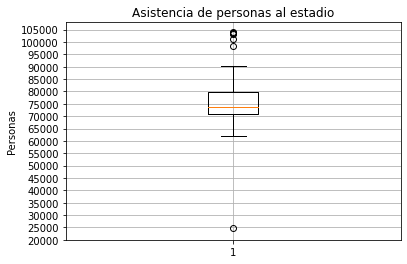

In [ ]:
plt.boxplot(championships['Attendance'])
plt.grid(True)
plt.yticks(np.arange(20000,110000,5000)) #(desde, hasta, espacio)
plt.ylabel('Personas') #nombre del eje del codominio.
plt.title('Asistencia de personas al estadio') #nombre de la gráfica.
plt.show()

Observamos que tenemos datos del tipo 'Outlier'

In [ ]:
#se calcula el valor de los cuartiles
Q1=championships['Attendance'].quantile(0.25)
Q2=championships['Attendance'].quantile(0.50)
Q3=championships['Attendance'].quantile(0.75)
RI=Q3-Q1
# Se calcula el valor del bigote superior
BS=Q3+(1.5*RI)
print('Bigote superior es: ', BS)
# Se calcula el valor del bigote inferior
BI=Q1-(1.5*RI)
print('Bigote inferior es: ', BI)

Bigote superior es:  92694.75
Bigote inferior es:  57934.75


Con esta información, sabemos que los datos mayores a 92694.75 y menores a 57934.75 son 'Outliers', veamos cuales son

In [ ]:
championships[championships['Attendance'] > BS]

,Super Bowl,Date,Winning team,Losing team,Venue,Attendance,Cities,State,Winner Score,Loser Score,Diference
10,11,"January 9, 1977",Oakland Raiders,Minnesota Vikings,Rose Bowl,103438,Pasadena,California,32,14,18
13,14,"January 20, 1980",Pittsburgh Steelers,Los Angeles Rams,Rose Bowl,103985,Pasadena,California,31,19,12
16,17,"January 30, 1983",Washington Redskins,Miami Dolphins,Rose Bowl,103667,Pasadena,California,27,17,10
20,21,"January 25, 1987",New York Giants,Denver Broncos,Rose Bowl,101063,Pasadena,California,39,20,19
26,27,"January 31, 1993",Dallas Cowboys,Buffalo Bills,Rose Bowl,98374,Pasadena,California,52,17,35
44,45,"February 6, 2011",Green Bay Packers,Pittsburgh Steelers,Cowboys Stadium,103219,Arlington,Texas,31,25,6


In [ ]:
championships[championships['Attendance'] < BI]


,Super Bowl,Date,Winning team,Losing team,Venue,Attendance,Cities,State,Winner Score,Loser Score,Diference
54,55,"February 7, 2021",Tampa Bay Buccaneers,Kansas City Chiefs,Raymond James Stadium,24835,Tampa,Florida,31,9,22


Ahora veamos la normalidad de los datos

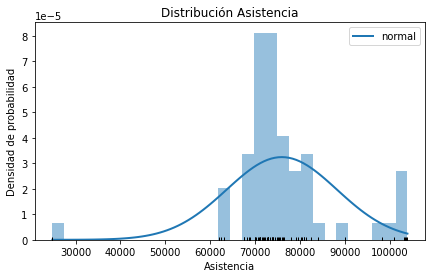

In [ ]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(championships['Attendance'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(championships['Attendance']), max(championships['Attendance']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=championships['Attendance'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(championships['Attendance'], np.full_like(championships['Attendance'], -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución Asistencia')
ax.set_xlabel('Asistencia')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

In [ ]:
shapiro_test = stats.shapiro(championships['Attendance'])
shapiro_test

ShapiroResult(statistic=0.811920702457428, pvalue=5.510077016879222e-07)

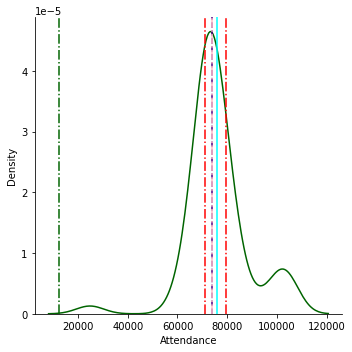

In [ ]:
sns.displot(championships['Attendance'], kind='kde', color="darkgreen");
plt.axvline(np.median(championships['Attendance']),color='indigo', linestyle='--')
plt.axvline(np.mean(championships['Attendance']),color='cyan', linestyle='-')
plt.axvline(np.std(championships['Attendance']),color='darkgreen', linestyle='-.')
plt.axvline(np.quantile(championships['Attendance'], 0.25),color='red', linestyle='-.')
plt.axvline(np.quantile(championships['Attendance'], 0.50),color='pink', linestyle='-.')
plt.axvline(np.quantile(championships['Attendance'], 0.75),color='red', linestyle='-.')
plt.show()

In [ ]:
coef_variación= (championships['Attendance'].std()/championships['Attendance'].mean())*100  
coef_variación

16.33323870252671

### **Variable 'Difference'**

In [ ]:
championships['Diference'].describe()

count    56.000000
mean     13.857143
std      10.289321
min       1.000000
25%       4.750000
50%      11.500000
75%      19.000000
max      45.000000
Name: Diference, dtype: float64

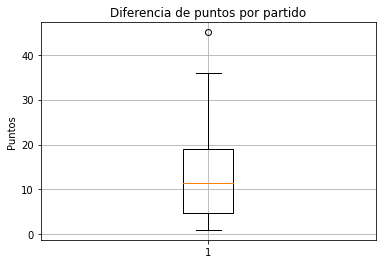

In [ ]:
plt.boxplot(championships['Diference'])
plt.grid(True)
#plt.yticks(np.arange(20000,110000,5000)) #(desde, hasta, espacio)
plt.ylabel('Puntos') #nombre del eje del codominio.
plt.title('Diferencia de puntos por partido') #nombre de la gráfica.
plt.show()

In [ ]:
#se calcula el valor de los cuartiles
Q1=championships['Diference'].quantile(0.25)
Q2=championships['Diference'].quantile(0.50)
Q3=championships['Diference'].quantile(0.75)
RI=Q3-Q1
# Se calcula el valor del bigote superior
BS=Q3+(1.5*RI)
print('Bigote superior es: ', BS)
# Se calcula el valor del bigote inferior
BI=Q1-(1.5*RI)
print('Bigote inferior es: ', BI)

Bigote superior es:  40.375
Bigote inferior es:  -16.625


In [ ]:
championships[championships['Diference'] > BS]

,Super Bowl,Date,Winning team,Losing team,Venue,Attendance,Cities,State,Winner Score,Loser Score,Diference
23,24,"January 28, 1990",San Francisco 49ers,Denver Broncos,Louisiana Superdome,72919,New Orleans,Louisiana,55,10,45


In [ ]:
shapiro_test = stats.shapiro(championships['Diference'])
shapiro_test

ShapiroResult(statistic=0.904589831829071, pvalue=0.00031836063135415316)

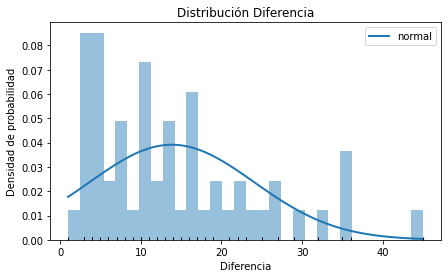

In [ ]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(championships['Diference'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(championships['Diference']), max(championships['Diference']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=championships['Diference'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(championships['Diference'], np.full_like(championships['Diference'], -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución Diferencia')
ax.set_xlabel('Diferencia')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

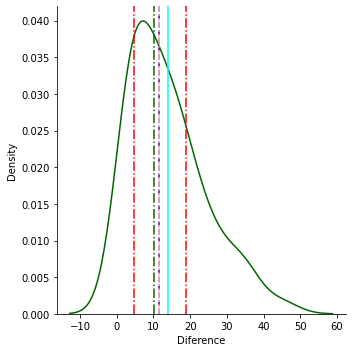

In [ ]:
sns.displot(championships['Diference'], kind='kde', color="darkgreen");
plt.axvline(np.median(championships['Diference']),color='indigo', linestyle='--')
plt.axvline(np.mean(championships['Diference']),color='cyan', linestyle='-')
plt.axvline(np.std(championships['Diference']),color='darkgreen', linestyle='-.')
plt.axvline(np.quantile(championships['Diference'], 0.25),color='red', linestyle='-.')
plt.axvline(np.quantile(championships['Diference'], 0.50),color='pink', linestyle='-.')
plt.axvline(np.quantile(championships['Diference'], 0.75),color='red', linestyle='-.')
plt.show()

In [ ]:
coef_variación= (championships['Diference'].std()/championships['Diference'].mean())*100  
coef_variación

74.25283309113611

#### ¿Cuál es la mayor y menor diferencia de puntos en cada partido? ✔

Gracias a la siguiente tabla y los resultados obtenidos podemos observar que la gran mayoría de los Super Bowls son juegos cerrados. Esto tiene sentido, ya que los equipos que logran llegar hasta la Super Bowl son equipos muy preparados.

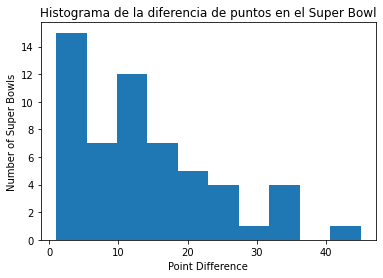

In [ ]:
plt.hist(championships.Diferencia)
plt.title('Histograma de la diferencia de puntos en el Super Bowl') #Se puede cambiar
plt.xlabel('Point Difference')
plt.ylabel('Number of Super Bowls')
plt.show()

In [ ]:
championships[championships['Diferencia'] == championships['Diferencia'].min()]

,Super Bowl,Date,Winning team,Losing team,Venue,Attendance,Referee,Cities,State,Winner Score,Loser Score,Diferencia
24,25,"January 27, 1991",New York Giants,Buffalo Bills,Tampa Stadium,73813,Jerry Seeman,Tampa,Florida,20,19,1


El juego más cerrado de la historia de los Super Bowls fue la derrota de los Buffalo Bills ante los New York Giants por **1 punto** en 1991, dicho partido se recuerda por el intento fallido de gol de campo de Scott Norwood en el último segundo que se fue desviado a la derecha, dandole la victoria al equipo enemigo.

In [ ]:
championships[championships['Diferencia'] == championships['Diferencia'].max()]

,Super Bowl,Date,Winning team,Losing team,Venue,Attendance,Referee,Cities,State,Winner Score,Loser Score,Diferencia
23,24,"January 28, 1990",San Francisco 49ers,Denver Broncos,Louisiana Superdome,72919,Dick Jorgensen,New Orleans,Louisiana,55,10,45


En el siguiente paso podemos observar que la mayor discrepancia de puntos de la historia fue de **45 puntos**, donde el miembro del Salón de la Fama Joe Montana logró llevar al equipo 49ers de San Francisco a la victoria en 1990, un año antes del partido más reñido de la historia.

### **Variable 'Winner Score'**

In [ ]:
championships['Winner Score'].describe()

count    56.000000
mean     30.000000
std       9.635163
min      13.000000
25%      23.000000
50%      30.500000
75%      35.000000
max      55.000000
Name: Winner Score, dtype: float64

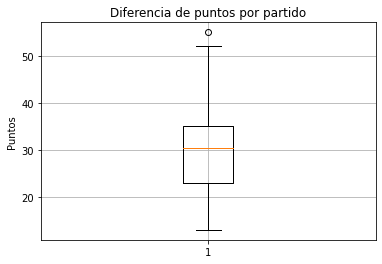

In [ ]:
plt.boxplot(championships['Winner Score'])
plt.grid(True)
#plt.yticks(np.arange(20000,110000,5000)) #(desde, hasta, espacio)
plt.ylabel('Puntos') #nombre del eje del codominio.
plt.title('Diferencia de puntos por partido') #nombre de la gráfica.
plt.show()

In [ ]:
#se calcula el valor de los cuartiles
Q1=championships['Winner Score'].quantile(0.25)
Q2=championships['Winner Score'].quantile(0.50)
Q3=championships['Winner Score'].quantile(0.75)
RI=Q3-Q1
# Se calcula el valor del bigote superior
BS=Q3+(1.5*RI)
print('Bigote superior es: ', BS)
# Se calcula el valor del bigote inferior
BI=Q1-(1.5*RI)
print('Bigote inferior es: ', BI)

Bigote superior es:  53.0
Bigote inferior es:  5.0


In [ ]:
championships[championships['Winner Score'] > BS]

,Super Bowl,Date,Winning team,Losing team,Venue,Attendance,Cities,State,Winner Score,Loser Score,Diference
23,24,"January 28, 1990",San Francisco 49ers,Denver Broncos,Louisiana Superdome,72919,New Orleans,Louisiana,55,10,45


In [ ]:
shapiro_test = stats.shapiro(championships['Winner Score'])
shapiro_test

ShapiroResult(statistic=0.9722873568534851, pvalue=0.22323007881641388)

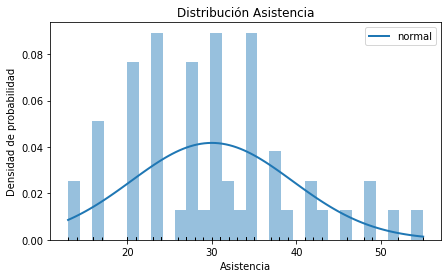

In [ ]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(championships['Winner Score'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(championships['Winner Score']), max(championships['Winner Score']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=championships['Winner Score'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(championships['Winner Score'], np.full_like(championships['Winner Score'], -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución Asistencia')
ax.set_xlabel('Asistencia')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

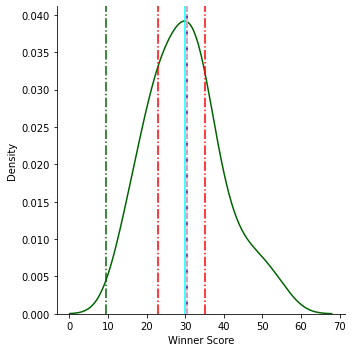

In [ ]:
sns.displot(championships['Winner Score'], kind='kde', color="darkgreen");
plt.axvline(np.median(championships['Winner Score']),color='indigo', linestyle='--')
plt.axvline(np.mean(championships['Winner Score']),color='cyan', linestyle='-')
plt.axvline(np.std(championships['Winner Score']),color='darkgreen', linestyle='-.')
plt.axvline(np.quantile(championships['Winner Score'], 0.25),color='red', linestyle='-.')
plt.axvline(np.quantile(championships['Winner Score'], 0.50),color='pink', linestyle='-.')
plt.axvline(np.quantile(championships['Winner Score'], 0.75),color='red', linestyle='-.')
plt.show()

In [ ]:
coef_variación= (championships['Winner Score'].std()/championships['Winner Score'].mean())*100  
coef_variación

32.11720958481841

### **Variable 'Loser Score'**

In [ ]:
championships['Loser Score'].describe()

count    56.000000
mean     16.142857
std       7.359418
min       3.000000
25%      10.000000
50%      17.000000
75%      21.000000
max      33.000000
Name: Loser Score, dtype: float64

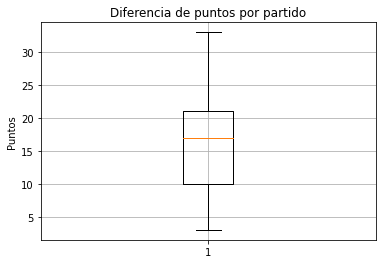

In [ ]:
plt.boxplot(championships['Loser Score'])
plt.grid(True)
#plt.yticks(np.arange(20000,110000,5000)) #(desde, hasta, espacio)
plt.ylabel('Puntos') #nombre del eje del codominio.
plt.title('Diferencia de puntos por partido') #nombre de la gráfica.
plt.show()

In [ ]:
#se calcula el valor de los cuartiles
Q1=championships['Loser Score'].quantile(0.25)
Q2=championships['Loser Score'].quantile(0.50)
Q3=championships['Loser Score'].quantile(0.75)
RI=Q3-Q1
# Se calcula el valor del bigote superior
BS=Q3+(1.5*RI)
print('Bigote superior es: ', BS)
# Se calcula el valor del bigote inferior
BI=Q1-(1.5*RI)
print('Bigote inferior es: ', BI)

Bigote superior es:  37.5
Bigote inferior es:  -6.5


In [ ]:
shapiro_test = stats.shapiro(championships['Loser Score'])
shapiro_test

ShapiroResult(statistic=0.968748927116394, pvalue=0.1540285348892212)

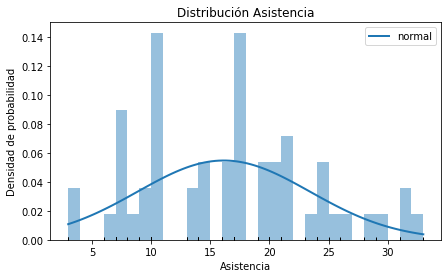

In [ ]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(championships['Loser Score'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(championships['Loser Score']), max(championships['Loser Score']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=championships['Loser Score'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(championships['Loser Score'], np.full_like(championships['Loser Score'], -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución Asistencia')
ax.set_xlabel('Asistencia')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

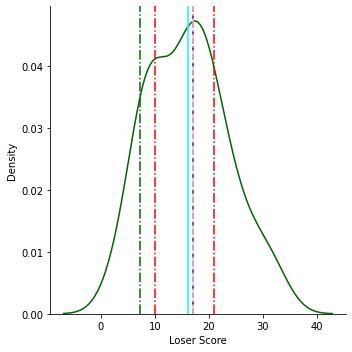

In [ ]:
sns.displot(championships['Loser Score'], kind='kde', color="darkgreen");
plt.axvline(np.median(championships['Loser Score']),color='indigo', linestyle='--')
plt.axvline(np.mean(championships['Loser Score']),color='cyan', linestyle='-')
plt.axvline(np.std(championships['Loser Score']),color='darkgreen', linestyle='-.')
plt.axvline(np.quantile(championships['Loser Score'], 0.25),color='red', linestyle='-.')
plt.axvline(np.quantile(championships['Loser Score'], 0.50),color='pink', linestyle='-.')
plt.axvline(np.quantile(championships['Loser Score'], 0.75),color='red', linestyle='-.')
plt.show()

In [ ]:
coef_variación= (championships['Loser Score'].std()/championships['Loser Score'].mean())*100  
coef_variación

45.58931742733613

### **Variable 'Avg. Viewers'**

In [ ]:
ratings['Rating HH'].describe()

count    55.000000
mean     43.345455
std       3.032345
min      36.000000
25%      41.200000
50%      43.100000
75%      46.000000
max      49.100000
Name: Rating HH, dtype: float64

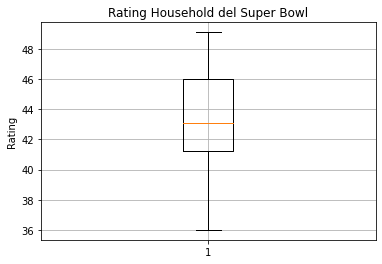

In [ ]:
plt.boxplot(ratings['Rating HH'])
plt.grid(True)
#plt.yticks(np.arange(20000,110000,5000)) #(desde, hasta, espacio)
plt.ylabel('Rating') #nombre del eje del codominio.
plt.title('Rating Household del Super Bowl') #nombre de la gráfica.
plt.show()

In [ ]:
shapiro_test = stats.shapiro(ratings['Rating HH'])
shapiro_test

ShapiroResult(statistic=0.978207528591156, pvalue=0.4151161015033722)

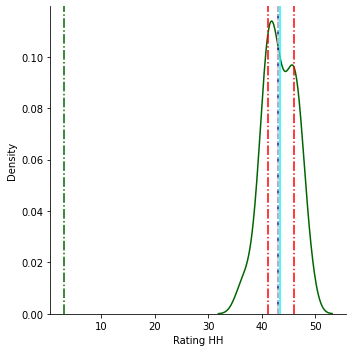

In [ ]:
sns.displot(ratings['Rating HH'], kind='kde', color="darkgreen");
plt.axvline(np.median(ratings['Rating HH']),color='indigo', linestyle='--')
plt.axvline(np.mean(ratings['Rating HH']),color='cyan', linestyle='-')
plt.axvline(np.std(ratings['Rating HH']),color='darkgreen', linestyle='-.')
plt.axvline(np.quantile(ratings['Rating HH'], 0.25),color='red', linestyle='-.')
plt.axvline(np.quantile(ratings['Rating HH'], 0.50),color='pink', linestyle='-.')
plt.axvline(np.quantile(ratings['Rating HH'], 0.75),color='red', linestyle='-.')
plt.show()

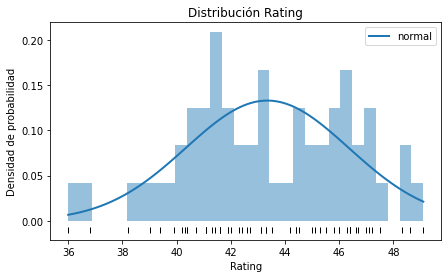

In [ ]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(ratings['Rating HH'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(ratings['Rating HH']), max(ratings['Rating HH']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=ratings['Rating HH'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(ratings['Rating HH'], np.full_like(ratings['Rating HH'], -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

In [ ]:
coef_variación= (ratings['Rating HH'].std()/ratings['Rating HH'].mean())*100  
coef_variación

6.995763000345325

### **Variable 'Total Viewers'**

In [ ]:
ratings['Rating HH'].describe()

count    55.000000
mean     43.345455
std       3.032345
min      36.000000
25%      41.200000
50%      43.100000
75%      46.000000
max      49.100000
Name: Rating HH, dtype: float64

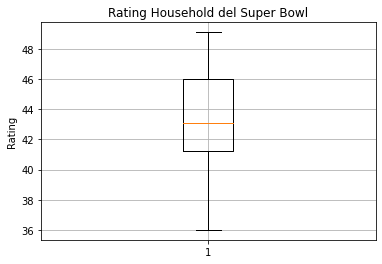

In [ ]:
plt.boxplot(ratings['Rating HH'])
plt.grid(True)
#plt.yticks(np.arange(20000,110000,5000)) #(desde, hasta, espacio)
plt.ylabel('Rating') #nombre del eje del codominio.
plt.title('Rating Household del Super Bowl') #nombre de la gráfica.
plt.show()

In [ ]:
shapiro_test = stats.shapiro(ratings['Rating HH'])
shapiro_test

ShapiroResult(statistic=0.978207528591156, pvalue=0.4151161015033722)

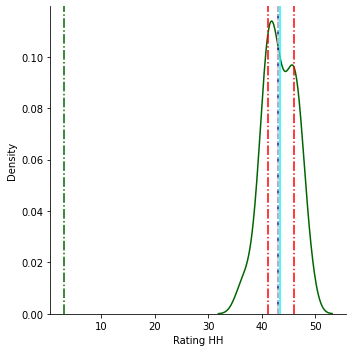

In [ ]:
sns.displot(ratings['Rating HH'], kind='kde', color="darkgreen");
plt.axvline(np.median(ratings['Rating HH']),color='indigo', linestyle='--')
plt.axvline(np.mean(ratings['Rating HH']),color='cyan', linestyle='-')
plt.axvline(np.std(ratings['Rating HH']),color='darkgreen', linestyle='-.')
plt.axvline(np.quantile(ratings['Rating HH'], 0.25),color='red', linestyle='-.')
plt.axvline(np.quantile(ratings['Rating HH'], 0.50),color='pink', linestyle='-.')
plt.axvline(np.quantile(ratings['Rating HH'], 0.75),color='red', linestyle='-.')
plt.show()

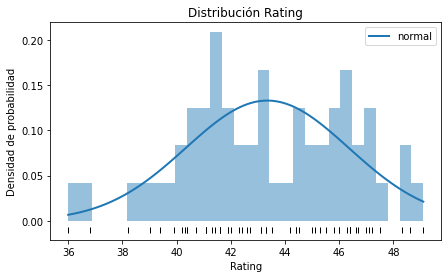

In [ ]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(ratings['Rating HH'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(ratings['Rating HH']), max(ratings['Rating HH']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=ratings['Rating HH'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(ratings['Rating HH'], np.full_like(ratings['Rating HH'], -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

In [ ]:
coef_variación= (ratings['Rating HH'].std()/ratings['Rating HH'].mean())*100  
coef_variación

6.995763000345325

### **Variable 'Rating HH'**

In [ ]:
ratings['Rating HH'].describe()

count    55.000000
mean     43.345455
std       3.032345
min      36.000000
25%      41.200000
50%      43.100000
75%      46.000000
max      49.100000
Name: Rating HH, dtype: float64

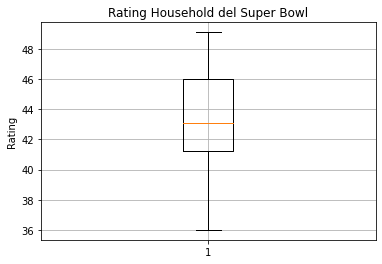

In [ ]:
plt.boxplot(ratings['Rating HH'])
plt.grid(True)
#plt.yticks(np.arange(20000,110000,5000)) #(desde, hasta, espacio)
plt.ylabel('Rating') #nombre del eje del codominio.
plt.title('Rating Household del Super Bowl') #nombre de la gráfica.
plt.show()

In [ ]:
shapiro_test = stats.shapiro(ratings['Rating HH'])
shapiro_test

ShapiroResult(statistic=0.978207528591156, pvalue=0.4151161015033722)

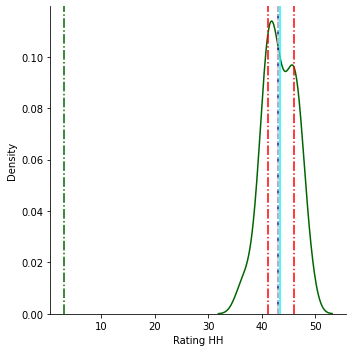

In [ ]:
sns.displot(ratings['Rating HH'], kind='kde', color="darkgreen");
plt.axvline(np.median(ratings['Rating HH']),color='indigo', linestyle='--')
plt.axvline(np.mean(ratings['Rating HH']),color='cyan', linestyle='-')
plt.axvline(np.std(ratings['Rating HH']),color='darkgreen', linestyle='-.')
plt.axvline(np.quantile(ratings['Rating HH'], 0.25),color='red', linestyle='-.')
plt.axvline(np.quantile(ratings['Rating HH'], 0.50),color='pink', linestyle='-.')
plt.axvline(np.quantile(ratings['Rating HH'], 0.75),color='red', linestyle='-.')
plt.show()

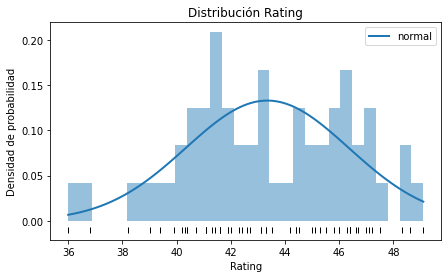

In [ ]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(ratings['Rating HH'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(ratings['Rating HH']), max(ratings['Rating HH']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=ratings['Rating HH'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(ratings['Rating HH'], np.full_like(ratings['Rating HH'], -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

In [ ]:
coef_variación= (ratings['Rating HH'].std()/ratings['Rating HH'].mean())*100  
coef_variación

6.995763000345325

### **Variable 'Share HH'**

In [ ]:
ratings['Rating HH'].describe()

count    55.000000
mean     43.345455
std       3.032345
min      36.000000
25%      41.200000
50%      43.100000
75%      46.000000
max      49.100000
Name: Rating HH, dtype: float64

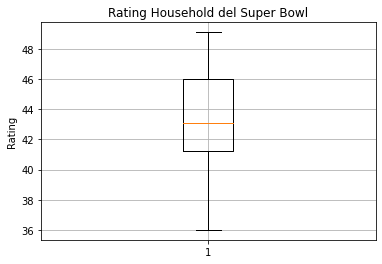

In [ ]:
plt.boxplot(ratings['Rating HH'])
plt.grid(True)
#plt.yticks(np.arange(20000,110000,5000)) #(desde, hasta, espacio)
plt.ylabel('Rating') #nombre del eje del codominio.
plt.title('Rating Household del Super Bowl') #nombre de la gráfica.
plt.show()

In [ ]:
shapiro_test = stats.shapiro(ratings['Rating HH'])
shapiro_test

ShapiroResult(statistic=0.978207528591156, pvalue=0.4151161015033722)

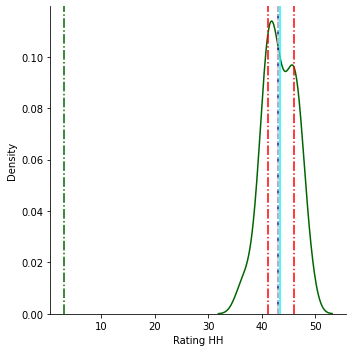

In [ ]:
sns.displot(ratings['Rating HH'], kind='kde', color="darkgreen");
plt.axvline(np.median(ratings['Rating HH']),color='indigo', linestyle='--')
plt.axvline(np.mean(ratings['Rating HH']),color='cyan', linestyle='-')
plt.axvline(np.std(ratings['Rating HH']),color='darkgreen', linestyle='-.')
plt.axvline(np.quantile(ratings['Rating HH'], 0.25),color='red', linestyle='-.')
plt.axvline(np.quantile(ratings['Rating HH'], 0.50),color='pink', linestyle='-.')
plt.axvline(np.quantile(ratings['Rating HH'], 0.75),color='red', linestyle='-.')
plt.show()

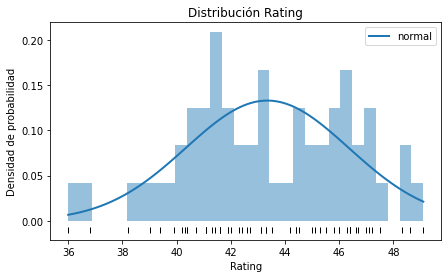

In [ ]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(ratings['Rating HH'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(ratings['Rating HH']), max(ratings['Rating HH']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=ratings['Rating HH'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(ratings['Rating HH'], np.full_like(ratings['Rating HH'], -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

In [ ]:
coef_variación= (ratings['Rating HH'].std()/ratings['Rating HH'].mean())*100  
coef_variación

6.995763000345325

### **Variable 'Rating 18-49'**

In [ ]:
ratings['Rating HH'].describe()

count    55.000000
mean     43.345455
std       3.032345
min      36.000000
25%      41.200000
50%      43.100000
75%      46.000000
max      49.100000
Name: Rating HH, dtype: float64

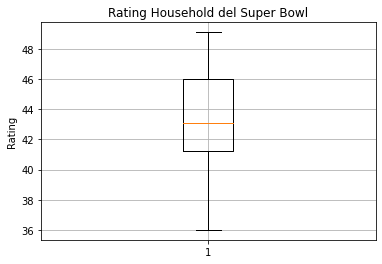

In [ ]:
plt.boxplot(ratings['Rating HH'])
plt.grid(True)
#plt.yticks(np.arange(20000,110000,5000)) #(desde, hasta, espacio)
plt.ylabel('Rating') #nombre del eje del codominio.
plt.title('Rating Household del Super Bowl') #nombre de la gráfica.
plt.show()

In [ ]:
shapiro_test = stats.shapiro(ratings['Rating HH'])
shapiro_test

ShapiroResult(statistic=0.978207528591156, pvalue=0.4151161015033722)

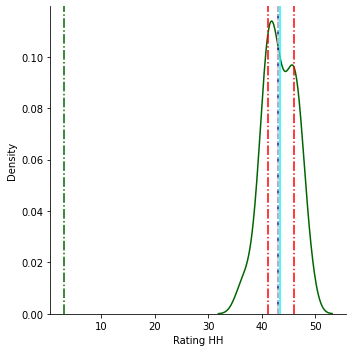

In [ ]:
sns.displot(ratings['Rating HH'], kind='kde', color="darkgreen");
plt.axvline(np.median(ratings['Rating HH']),color='indigo', linestyle='--')
plt.axvline(np.mean(ratings['Rating HH']),color='cyan', linestyle='-')
plt.axvline(np.std(ratings['Rating HH']),color='darkgreen', linestyle='-.')
plt.axvline(np.quantile(ratings['Rating HH'], 0.25),color='red', linestyle='-.')
plt.axvline(np.quantile(ratings['Rating HH'], 0.50),color='pink', linestyle='-.')
plt.axvline(np.quantile(ratings['Rating HH'], 0.75),color='red', linestyle='-.')
plt.show()

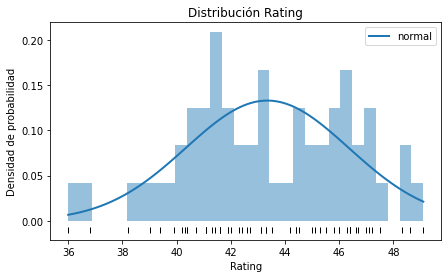

In [ ]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(ratings['Rating HH'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(ratings['Rating HH']), max(ratings['Rating HH']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=ratings['Rating HH'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(ratings['Rating HH'], np.full_like(ratings['Rating HH'], -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

In [ ]:
coef_variación= (ratings['Rating HH'].std()/ratings['Rating HH'].mean())*100  
coef_variación

6.995763000345325

### **Variable 'Share 18-49'**

In [ ]:
ratings['Rating HH'].describe()

count    55.000000
mean     43.345455
std       3.032345
min      36.000000
25%      41.200000
50%      43.100000
75%      46.000000
max      49.100000
Name: Rating HH, dtype: float64

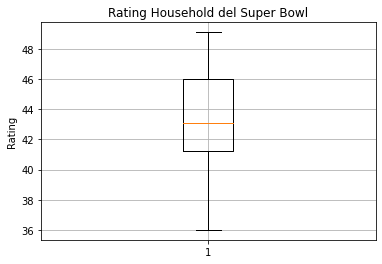

In [ ]:
plt.boxplot(ratings['Rating HH'])
plt.grid(True)
#plt.yticks(np.arange(20000,110000,5000)) #(desde, hasta, espacio)
plt.ylabel('Rating') #nombre del eje del codominio.
plt.title('Rating Household del Super Bowl') #nombre de la gráfica.
plt.show()

In [ ]:
shapiro_test = stats.shapiro(ratings['Rating HH'])
shapiro_test

ShapiroResult(statistic=0.978207528591156, pvalue=0.4151161015033722)

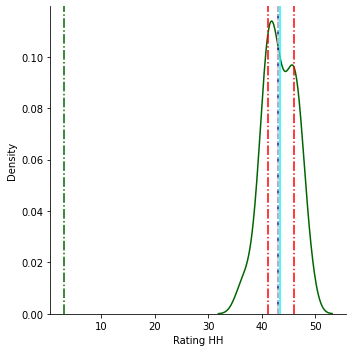

In [ ]:
sns.displot(ratings['Rating HH'], kind='kde', color="darkgreen");
plt.axvline(np.median(ratings['Rating HH']),color='indigo', linestyle='--')
plt.axvline(np.mean(ratings['Rating HH']),color='cyan', linestyle='-')
plt.axvline(np.std(ratings['Rating HH']),color='darkgreen', linestyle='-.')
plt.axvline(np.quantile(ratings['Rating HH'], 0.25),color='red', linestyle='-.')
plt.axvline(np.quantile(ratings['Rating HH'], 0.50),color='pink', linestyle='-.')
plt.axvline(np.quantile(ratings['Rating HH'], 0.75),color='red', linestyle='-.')
plt.show()

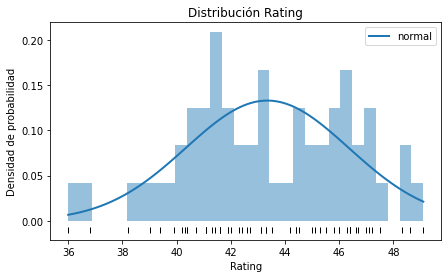

In [ ]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(ratings['Rating HH'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(ratings['Rating HH']), max(ratings['Rating HH']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=ratings['Rating HH'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(ratings['Rating HH'], np.full_like(ratings['Rating HH'], -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

In [ ]:
coef_variación= (ratings['Rating HH'].std()/ratings['Rating HH'].mean())*100  
coef_variación

6.995763000345325

## **Variables categóricas**

### **Variable 'Cities'**




####¿ Cuál es la ciudad que más veces ha celebrado el super bowl y cuál estadio lo ha hecho?✔

A través de las siguientes graficas podemos observar la cantidad de veces que se han jugado los Super Bowl en las ciudades de Estados Unidos, obteniendo a su vez la ciudad en donde más se ha jugado dicho evento, siendo esta la ciudad de Miami.

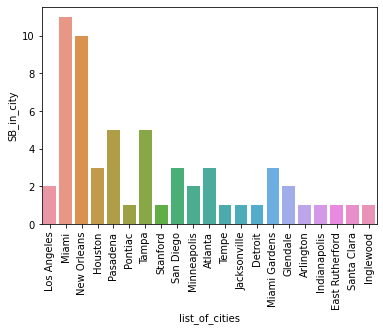

,list_of_cities,SB_in_city
1,Miami,11


In [ ]:
list_of_cities = []
SB_in_city = []

for city in championships['Cities']:
  if city not in list_of_cities:
    list_of_cities.append(city)                                       #creamos una lista con las ciudades sin repeetir
    SB_in_city.append(str(championships['Cities'].array).count(city)) #Contamos la cantidad de apariciones de cada ciudad
    
Games_per_city = pd.DataFrame()
Games_per_city['list_of_cities'] = list_of_cities
Games_per_city['SB_in_city'] = SB_in_city

gpc = Games_per_city

sns.barplot(x = 'list_of_cities', y = 'SB_in_city', data = gpc)
plt.xticks(rotation = 'vertical')

plt.show()

Games_per_city[Games_per_city['SB_in_city'] == Games_per_city['SB_in_city'].max()]

En la siguiente grafica podemos observar la relación entre los estadios donde se ha jugado el Super Bowl con la cantidad de veces que se ha jugado en dicho estadio. De la tabla podemos observar que el estadio con mayor cantidad de Super Bowls jugados es Louisiana Superdome.

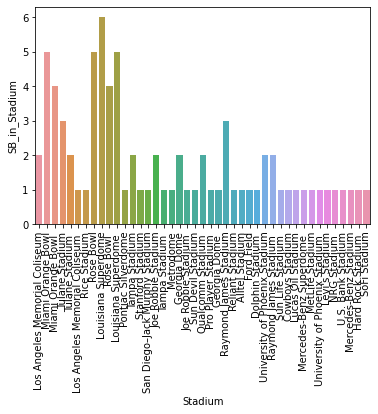

,Stadium,SB_in_Stadium
8,Louisiana Superdome,6


In [ ]:
SB_in_stadium = []
list_of_stadium = []

for stadium in championships['Venue']:
  if stadium not in list_of_stadium:
    list_of_stadium.append(stadium)
    SB_in_stadium.append(str(championships['Venue'].array).count(stadium))

Games_per_stadium = pd.DataFrame()
Games_per_stadium['Stadium'] = list_of_stadium
Games_per_stadium['SB_in_Stadium'] = SB_in_stadium

gps = Games_per_stadium

sns.barplot(x = 'Stadium', y = 'SB_in_Stadium', data = gps)
plt.xticks(rotation = 'vertical')
plt.show()

Games_per_stadium[Games_per_stadium['SB_in_Stadium'] == Games_per_stadium['SB_in_Stadium'].max()]

### **Variable 'Venue'**

### **Variable 'States'**

#### ¿En que Estado se ha jugado más veces el Super Bowl?✔


In [ ]:
#from osgeo import gdal
#gdal.SetConfigOption('SHAPE_RESTORE_SHX', 'YES')
#states = gpd.read_file('/content/usa-states-census-2014.shp')
states = gpd.read_file('/vsicurl/https://github.com/EdeEsteban/Analitica-de-Datos/blob/main/USA_States/USA_States.shp')


#Juegos por estado
list_of_states = []
SB_in_states = []

for state in championships['State']:
  state = quitarvaciof(state) #Algunas veces el estado tiene un espacio final al final, lo quitamos

  if state not in list_of_states:
    list_of_states.append(state)                                       #creamos una lista con las ciudades sin repeetir
    SB_in_states.append(str(championships['State'].array).count(state)) #Contamos la cantidad de apariciones de cada ciudad

#Quitamos el espacio al principio en estados
for i in range(len(list_of_states)):
  list_of_states[i] = list_of_states[i][1:]

  
Games_per_states = pd.DataFrame()
Games_per_states['list of states'] = list_of_states
Games_per_states['Super Bowl in state'] = SB_in_states

sb_per_state = []

for i in states['NAME'].array:
  if i in Games_per_states['list of states'].array:
    sb_per_state.append(int(Games_per_states[Games_per_states['list of states'] == i ]['Super Bowl in state']))
  else:
     sb_per_state.append(0)
states['Game per state'] = sb_per_state    

# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(20, 20))
 
# Control del título y los ejes
ax.set_title('Super Bowl por Estado', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
 
# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Generar y cargar el mapa
states.plot(column='Game per state', cmap='plasma', ax=ax,
              legend=True, cax=cax, zorder=5)
 

ERROR:fiona._env:`/vsicurl/https://github.com/EdeEsteban/Analitica-de-Datos/blob/main/USA_States/USA_States.shp' not recognized as a supported file format.


DriverError: ignored

Gracias al grafico de mapa podemos observar que el Estado con más Super Bowls jugados es Florida con un total de 17 Super Bowls y en segundo lugar se encuentra California, con un total de 13 Super Bowls.

### **Variable 'Winner Team'**

#### ¿Cuál es el equipo que más veces ha ganado? ✔

En la siguiente tabla podemos observar la cantidad de victorias de cada equipo 

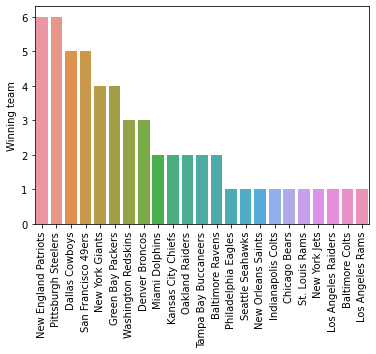

In [ ]:
sns.barplot(x = championships['Winning team'].value_counts().index, y=championships['Winning team'].value_counts()) 
plt.xticks(rotation = 'vertical')
plt.show()

Los equipos que más veces han ganado son 'New England Patriots' y 'Pittsburg Steelers' con 6 ediciones cada uno.

### **Variable 'Loser Team'**

#### ¿Cuál es el equipo que más veces ha perdido? ✔

En la siguiente tabla podemos observar la cantidad de derrotas de cada equipo 

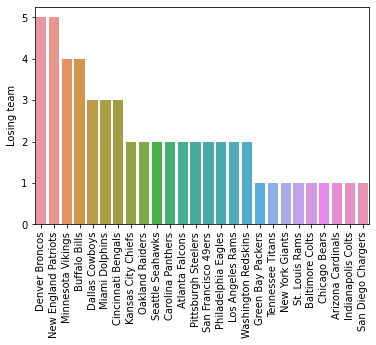

In [ ]:
sns.barplot(x = championships['Losing team'].value_counts().index, y=championships['Losing team'].value_counts()) 
plt.xticks(rotation = 'vertical')
plt.show()

Los equipos que más veces han perdido son 'Denver Broncos' y 'New England Patriots' con 5 partidos cada uno.

## **Relaciones entre variables**

### ¿Cual es la relación entre los espectadores, el raiting familiar y los costos publicitarios?✔

---



In [ ]:
plt.subplot(3, 1, 1)
plt.plot(ratings['Super Bowl'], ratings['Avg. viewers(millions)'], color= '#648FFF')
plt.title('Average Number of US Viewers')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
# Activate the middle subplot
plt.subplot(3, 1, 2)
plt.plot(ratings['Super Bowl'],ratings['Rating HH'], color= '#DC267F')
plt.title('Household Rating')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
# Activate the bottom subplot
plt.subplot(3, 1, 3)
plt.plot(ratings['Super Bowl'], ratings['Adjusted to inflation 2021'], color= '#FFB000')
plt.title('Ad Cost')
plt.xlabel('SUPER BOWL')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
# Improve the spacing between subplots
plt.tight_layout()


Estas tres graficas  estan en relacion al tiempo, X-Edicion del Super Bowl y Y- Hay tres parametros:

* **Promedio de Visualizaciones**

* **Household Rating**

* **Costos de Anuncios**

Podemos ver que los espectadores aumentaron antes de que lo hicieran los costos publicitarios. ¿tal vez los espectáculos de medio tiempo no eran tan buenos en los primeros años? El espectáculo moderno del Super Bowl tiene mucho que ver con el prestigio cultural de los grandes actos de medio tiempo. Despues de invertigar observamos que los shows de medio tiempo en los inicios del Super Bowl eran simples en comparación con los actuales. 

### Media de puntos de los partidos *

Podemos observar que el promedio de puntos de los partidos es de 46.14, la mediana es de 46

In [ ]:
Tpoints = championships['Winner Score']+championships['Loser Score']

plt.boxplot(Tpoints)
plt.show()

Tpoints.describe()

Podemos observar que el promedio de puntos de los partidos es de 46.14, la mediana es de 46


### ¿Cuál es el equipo que más veces ha participado? ✔

en la siguiente grafica podemos observar la cantidad de partidos que ha jugado cada equipo 

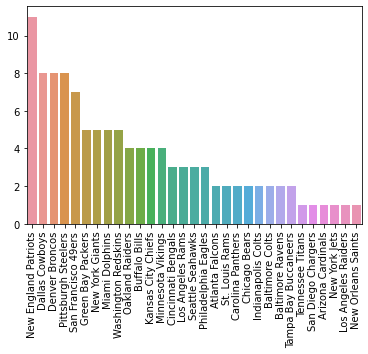

In [ ]:
df=pd.concat([championships['Losing team'], championships['Winning team']])
sns.barplot(x = df.value_counts().index, y=df.value_counts()) 
plt.xticks(rotation = 'vertical')
plt.show()

El equipo que más veces ha jugado el Super Bowl es 'New England Patriots', el cual lo ha jugado 11 veces.

# **4. Estadística Inferencial**

  ## **2.2 Atributos Cuantitativos**


    2.2.1 Hacer una tabla unicamente con los datos numéricos \\
      super bowl\\
      Avg viewers\\
      total viewers\\
      rating HH\\
      Share HH\\
      Adj to inflation<-llamarlo anuncio\\
      Diferencia\\
      attendance\\
      winner score\\
      loser score\\

    (Hay que poner la descripción de las variables aquí)

### Matriz de Correlación

Podemos observar que el promedio de visualizaqciones está estrechamente relacionado con la edición del Super Bowl, esto nos podria indicar que por cada edición aumentan los espectadores.

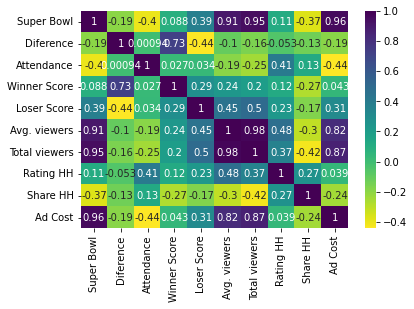

In [ ]:
sns.heatmap(Dcuantitativos.corr(), cmap = 'viridis_r', annot = True)

### El Share depende de la Diferencia

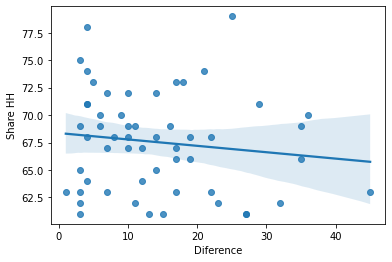

In [ ]:
sns.regplot(x= 'Diference', y= 'Share HH', data=Dcuantitativos)

### El Share depende del puntaje del equipo ganador

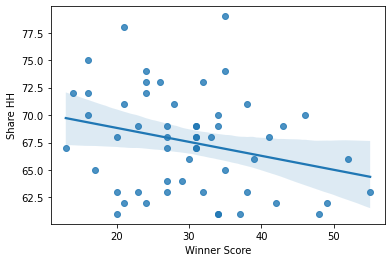

In [ ]:
sns.regplot(x= 'Winner Score', y= 'Share HH', data=Dcuantitativos)

### El Rating depende de la Diferencia

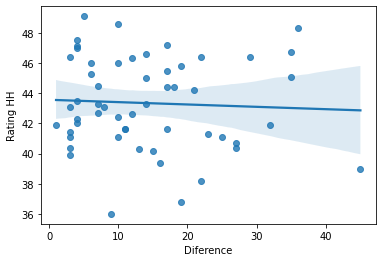

In [ ]:
sns.regplot(x= 'Diference', y= 'Rating HH', data=Dcuantitativos)

### El Rating depende de la Asistencia

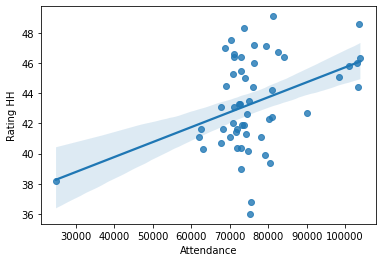

In [ ]:
sns.regplot(x= 'Attendance', y= 'Rating HH', data=Dcuantitativos)

### El Share depende de la Asistencia

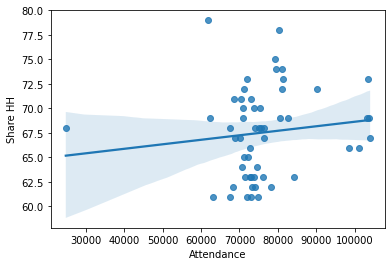

In [ ]:
sns.regplot(x= 'Attendance', y= 'Share HH', data=Dcuantitativos)

## **2.3 Atributos Cualitativos**

### El Share depende de la Ciudad 

Para ello hallemos las medias de rating por cada ciudad en la que se ha jugado

In [ ]:
CiudadMed = pd.DataFrame(data=[championships['Cities'], ratings['Rating HH']]).T
CiudadMed.head()

,Cities,Rating HH
0,Los Angeles,41.1
1,Miami,36.8
2,Miami,36.0
3,New Orleans,39.4
4,Miami,39.9


In [ ]:
CiudadMed.groupby('Cities').mean()

,Rating HH
Cities,
Arlington,46.000000
Atlanta,43.300000
Detroit,41.600000
East Rutherford,46.700000
Glendale,45.300000
Houston,42.766667
Indianapolis,47.000000
Inglewood,NaN
Jacksonville,41.100000



# **5. Conclusiones**


1. Concluimos que no sabemos nada :)
2. El supero bowl es bueno, bonito y muy caro
3. Estoy caliente primer aviso